In [1]:
from google.colab import drive
drive.mount('//content//drive')

Drive already mounted at //content//drive; to attempt to forcibly remount, call drive.mount("//content//drive", force_remount=True).


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_dir = '/content/drive/MyDrive/tmp 1/Gambo/Train'
validation_dir = '/content/drive/MyDrive/tmp 1/Gambo/Validation'
# التحقق من وجود المجلدات
import os
if not os.path.exists(train_dir):
    raise FileNotFoundError(f"Train directory not found: {train_dir}")
if not os.path.exists(validation_dir):
    raise FileNotFoundError(f"Validation directory not found: {validation_dir}")
# إنشاء كائنات ImageDataGenerator للتدريب والتحقق
train_datagen = ImageDataGenerator(
    rescale=1./255)          # تغيير حجم البكسل ليكون بين 0 و 1



validation_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    color_mode="grayscale",
    target_size=(28, 28),  # تغيير حجم الصور إلى 28x28
    batch_size=32,           # حجم الدفعة
    class_mode='categorical',      # وضع التصنيف (متعدد)


)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    color_mode="grayscale",
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',

)

Found 151649 images belonging to 3 classes.
Found 15114 images belonging to 3 classes.


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

In [5]:
model = Sequential([
    Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='sigmoid'),
    Dense(3, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,359,360 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,434,627 (9.29 MB)

 Trainable params: 2,434,627 (9.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from keras.callbacks import ModelCheckpoint


checkpoint = ModelCheckpoint(
    filepath='best_model.keras',
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min'
)


history = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=20,
    callbacks=[checkpoint]
)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12s/step - accuracy: 0.5152 - loss: 1.0454 
Epoch 1: val_loss improved from inf to 0.79733, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 834s 38s/step - accuracy: 0.5195 - loss: 1.0372 - val_accuracy: 0.6562 - val_loss: 0.7973
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7073 - loss: 0.6574
Epoch 2: val_loss improved from 0.79733 to 0.67536, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 218s 11s/step - accuracy: 0.7085 - loss: 0.6561 - val_accuracy: 0.7531 - val_loss: 0.6754
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8038 - loss: 0.5218
Epoch 3: val_loss improved from 0.67536 to 0.66681, saving model to best_model.keras
20/20 ━━━━━━━━━━━━━━━━━━━━ 188s 10s/step - accuracy: 0.8034 - loss: 0.5223 - val_accuracy: 0.7312 - val_loss: 0.6668
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.7849 - loss: 0.5002
Epoch 4: val_loss did not improve from 0.66681
20/20 ━━━━━━━━━━━

In [ ]:
model.save('my_model.keras')
test_dir='/content/drive/MyDrive/tmp 1/Gambo/Test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    color_mode="grayscale",
    target_size=(28, 28),
    batch_size=32,
    class_mode='categorical',


)

Found 56723 images belonging to 3 classes.


In [ ]:
model.evaluate(
    test_generator,
    batch_size=40,
    steps=20,

)

20/20 ━━━━━━━━━━━━━━━━━━━━ 153s 8s/step - accuracy: 0.8354 - loss: 0.4142


[0.4434072971343994, 0.824999988079071]

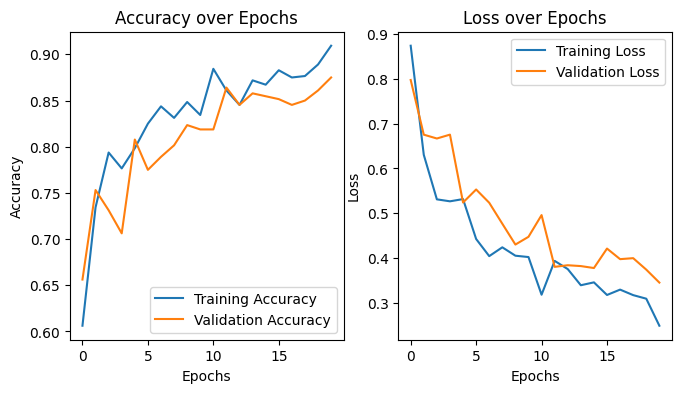

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()
